<a href="https://colab.research.google.com/github/ahmerayaz2000/CS351-AI-lab-2022070/blob/main/ahmerayaz_CS_351L_Lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training samples: 124, Testing samples: 54


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_3 (Dense)               │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 419 (1.64 KB)

 Trainable params: 419 (1.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.3033 - loss: 1.2129 - val_accuracy: 0.4400 - val_loss: 1.1406
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3625 - loss: 1.1443 - val_accuracy: 0.4400 - val_loss: 1.0964
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4242 - loss: 1.0995 - val_accuracy: 0.4400 - val_loss: 1.0640
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4742 - loss: 1.0634 - val_accuracy: 0.4400 - val_loss: 1.0356
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5602 - loss: 1.0296 - val_accuracy: 0.7200 - val_loss: 1.0060
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7226 - loss: 0.9928 - val_accuracy: 0.7600 - val_loss: 0.9669
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7520 - loss: 0.9496 - val_accuracy: 0.8000 - val_loss: 0.9163
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8568 - loss: 0.8947 - val_accuracy: 0.8000 - val_l

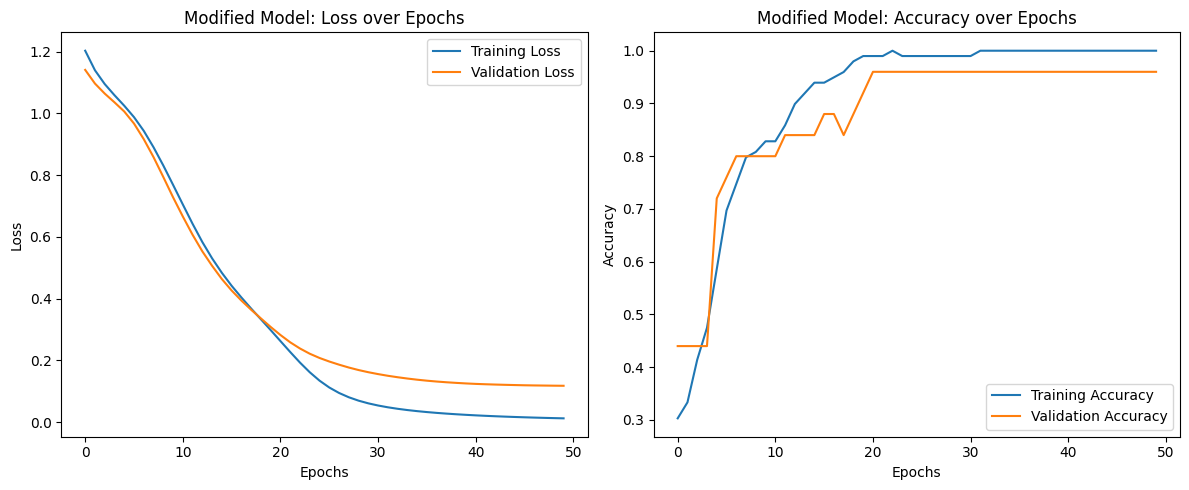

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import tensorflow as tf  # Ensure TensorFlow is imported
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load Wine Quality dataset
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names

# Preprocess the data
encoder = LabelBinarizer()
y_encoded = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# Modified Neural Network with an additional hidden layer
modified_model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],), name="Hidden_Layer_1"),
    Dense(16, activation='relu', name="Hidden_Layer_2"),  # New layer with 16 neurons
    Dense(8, activation='relu', name="Hidden_Layer_3"),  # Original second layer now becomes third
    Dense(y_train.shape[1], activation='softmax', name="Output_Layer")
])

# Compile the model
modified_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Display model summary
modified_model.summary()

# Train the modified model
modified_history = modified_model.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=8,
    verbose=1
)

# Visualize training history
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(modified_history.history['loss'], label='Training Loss')
plt.plot(modified_history.history['val_loss'], label='Validation Loss')
plt.title('Modified Model: Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(modified_history.history['accuracy'], label='Training Accuracy')
plt.plot(modified_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Modified Model: Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
